## Final Project Submission


* Student name:  Noah-John Hizon
* Student pace: part time 
* Scheduled project review date/time: 11/1 4:30PM
* Instructor name: Abhineet Kulkarni


# Determining Attributes of Good Restaurants Using Review Text

![](path/to/image.png)

## Project Overview/Summary

The focus of this project is to identify key attributes that make a restaurant "good" or "bad". This would be of value to restaurants who are looking to improve their business, but have no idea where to start. By using the "voice of the people" through the reviews they leave on restaurant businesses, direct feedback and routes to improve service can be identified. 

Restaurant review data sourced from a web scraped Yelp dataset was used in order to develop a NLP (Natural Language Processing) model that differentiates good reviews from bad reviews. Stopwords were removed, and all document tokens in the model were lemmatized in order to consolidate via root words. The TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer is used in conjunction with the Multinomial Naive Bayes classifier, in order to create a model that successfully classifies a review as "good" or "bad".

Additionally, using the review dataset, a rudimentary proof-of-concept recommendation system was created in order to provide restaurant suggestions for a given category, using using user_IDs, business_IDs, and review ratings for reference. This system is meant to serve as a follow-up to the NLP model, to provide a user facing solution that assists choosing restaurants. 

Differentiating review types has massive implications on the ability to identify the competence of a restaurant. The resulting model was able to successfully assign a review type with an accuracy of 84% on training data and 83% on testing data.  

## Business Problem 

In an industry as sensitive as food service, reviews, whether on a customer level or a professional level can make or break a restaurant in a customer's mind. Review services like Yelp and Google Reviews are instrumental for tourists and locals alike when informing decisions on where to eat for a night out. Any combination of factors can lead people to leave a review on a business's page, whether they be positive/supportive, detrimental/harsh, or somewhere in between. Owners with failing restaurant businesses may be at a loss when trying to find avenues of improvement. Significant investment in new hardware, staffing, or ingredients may be costly and prove to not be worth it. 

Without a culinary degree being a given in the restaurant industry, there is an interminable range of quality and service standards the average diner may run into; many times, the choice is a shot in the dark. From personal experience, I have gone to restaurants whose food can be seen as barely edible, but have excellent review aggregates. On the contrary, when going to restaurants that have subpar quality decor/cleanliness, the food I end up eating ends up being phenomenal. Unassuming exteriors like Sal's Pizza in Brooklyn, Peck Peck Chicken in Teaneck NJ, and Bagel Twist in Teaneck, NJ have m. Other times, in the face of mediocre food, some restaurants have outstanding service from their staff, which ends up bumping up the overall perception of satisfaction in my mind.

TV shows like Gordon Ramsay's Kitchen Nightmares offer the average viewer a look behind the curtain, into where underperforming restaurants are going wrong. In a similar vein, looking at review data gives context into the quality of restaurants in a given neighborhood, and provide insight into whether a restaurant is worth supporting or not. However, a cumulative 5-star review via Yelp can only hold so much information, and its reliability is dependent on a plethora of other factors that vary from restaurant to restaurant. 
 
Thankfully, Yelp has an abundance of additional information, some being information in the form of review text. Yelp's review system enables users to write essay-length summaries of their experiences with restaurants. Yelp restaurant data spanning 2010 to 2014 will be aggregated and modeled via Natural Language Processing (NLP) in order to classify an individual review as bad or good. Looking at the importance of features within the predicting model will inform key features within restaurants that should be scrutinized when looking to improve overall satisfaction. To supplement this analysis, a recommendation system will be created using user reviews, in order to provide a user-informed method of restaurant selection.

## Data Understanding

Aggregate data from the review site, Yelp, was found pre-scraped from a Kaggle dataset. All packages for interpretation/modeling are imported in this step. Each row in the initial dataset represents an individual review, with its user, business, review text, review rating, and supplementary elements that help further identify the business. Upon observation, the review text is represented in the 'text' column, as a long string separated by spaces and punctuation.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_score
from sklearn.ensemble import RandomForestClassifier

from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, FreqDist, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

reviewdata = pd.read_csv('yelpcomgen.csv',header=0,encoding='latin-1')
reviewdata.head(5)

C:\Users\noahi\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,1,2,4,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,YEAR,votes.useful,...,name,attributes.Price Range,review_count,stars1,Votestot,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,__FtIsjOxPkqiYfQedYgTg,4Rs8MQBEzfXLrM8Srf5ZFw,Good back home type of food and the best servi...,0.0,VkPzsY09S4zO0XqhA1mc6Q,0.0,4.0,2014-07-05,2014.0,0.0,...,Island Flavor,2.0,488.0,4.5,4.0,NaN,NaN,NaN,NaN,NaN
1,__FtIsjOxPkqiYfQedYgTg,uxqjGjYC8OId-JS-GVLOrQ,Too many fun memories here mostly drinking!! B...,0.0,U87W6T9vjwWnp28Zjnn4pQ,0.0,4.0,2014-07-01,2014.0,0.0,...,Triple 7 Restaurant & Microbrewery,2.0,281.0,3.5,4.0,NaN,NaN,NaN,NaN,NaN
2,__FXEOrWIjXMOElz2pGlBQ,2KAfm9Lqh-1-qUe8V1cc6w,I've been back twice now. The first time I ord...,0.0,aS-mHlVamCV2rTiw8RrNdw,0.0,5.0,2014-05-08,2014.0,0.0,...,Rito's,2.0,55.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN
3,__JgFZ3h2LyTMTtZdf0HYw,SkR3zBOXJggDAIq5qzEUHg,Great place for a late night meal. Cool atomos...,0.0,4bEjOyTaDG24SY5TxsaUNQ,0.0,4.0,2014-03-20,2014.0,0.0,...,Mon Ami Gabi,2.0,4084.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
4,__JmvLJkdl_n48eZCFa4Sg,-XB4eE01MT9qwqj5PSmbvw,"I used to love this place, but over time the s...",0.0,eLPld7Q17XxlclFGzZQX5g,0.0,1.0,2014-07-03,2014.0,0.0,...,Yama Sushi,2.0,874.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN


The user_id and business_id seem to be randomly generated strings, but are unique to each individual user/restaurant respectively. In addition to these, there are supplementary attributes that may be relevant for future analyses, such as votes for any particular review, and date, but are not relevant for the NLP model and recommendation system.

The field most critical to differentiating good vs. bad reviews is the 'stars1' field, which represents a review score from a scale of 1 to 5 for each review, in increments of 1/2 star. 

There are a massive amount of reviews in the dataset to parse through, with around 50k individual users that have written reviews, and ~3.5k unique businesses. That being said, there are more than enough records for the NLP model. 

In [55]:
print(f"There are {len(reviewdata)} total songs in the dataset")
print("__________________")
print(f"There are {reviewdata.user_id.nunique()} unique users in the dataset")
print("__________________")
print(f"There are {reviewdata.business_id.nunique()} unique businesses in the dataset")

There are 699459 total songs in the dataset
__________________
There are 49797 unique users in the dataset
__________________
There are 3481 unique businesses in the dataset


Below, a histogram displaying a distribution of the amount of reviews each individual business has; for the most part, it seems as if over half of the  businesses within the dataset have a review count of 50, the most common counts between 15-20. The individual review count for each business actually doesn't matter as much, since the prediction is not done for each individual business, but on the set as a whole.

<AxesSubplot:title={'center':'Review Count Distribution by Restaurant ID'}, ylabel='Frequency'>

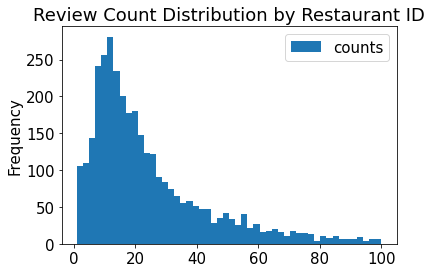

In [56]:
revcounts=pd.DataFrame(reviewdata.business_id.value_counts())
revcounts.columns=['counts']
revcounts=revcounts[revcounts.counts<=100]
revcounts.plot(kind='hist',title='Review Count Distribution by Restaurant ID',bins=50)

Price range is an interesting attribute to look at, as the amount of $'s  visible on a given Yelp business designates what price range it falls in, 1 sign being the cheapest, and 4 signs being the most expensive, usually characterizing "fine dining".  The average star rating by each designated price range was calculated. Surprisingly, the 1 sign had the highest average rating, while 2 signs had the lowest. This may be due to the abundance of restaurants categorized under 2 signs, the breadth of reviews bringing the overall score down. 4 sign restaurants have the least amount of reviews, and this is to be expected. Fine dining restaurants are not easily accessible to the average diner.

2.0    65904
1.0    21411
3.0     9026
4.0     3997
Name: attributes.Price Range, dtype: int64


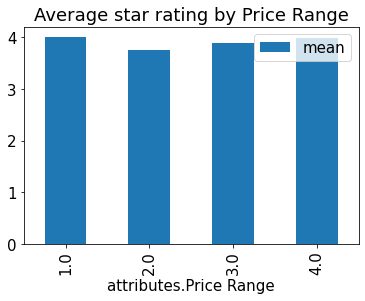

In [57]:
print(reviewdata['attributes.Price Range'].value_counts())

plot=reviewdata.groupby(['attributes.Price Range'])['stars1'].agg(['mean']).plot(kind="bar",title='Average star rating by Price Range')

Below, a bar chart is created depicting the star rating distribution for all reviews of the data set. 4 stars seem to hold the majority of reviews, with the 1.5 and 2 star reviews having the least amount of ratings. The amount is unsurprising, as if any restaurant had 1.5 star reviews on average, they likely would be out of business.

[Text(0, 0, '1.5'),
 Text(1, 0, '2.0'),
 Text(2, 0, '2.5'),
 Text(3, 0, '3.0'),
 Text(4, 0, '3.5'),
 Text(5, 0, '4.0'),
 Text(6, 0, '4.5'),
 Text(7, 0, '5.0')]

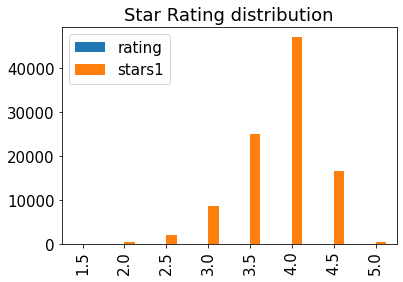

In [59]:
star1counts=pd.DataFrame(reviewdata.stars1.value_counts())
star1counts.reset_index(inplace=True)
star1counts=star1counts.sort_values(by=['index'],ascending=True)
star1counts.head(10)
star1counts['index'].head()
star1counts.rename(columns={'index':'rating'},inplace=True)
star1counts.plot(kind='bar',title='Star Rating distribution').set_xticklabels(star1counts['rating'])

An interesting field to use for the recommendation system is categories, stored as seen below as a text string separated by semicolons. Parsing these categories out using the split operator is performed, converting the string into a list.

Below, a function is defined used to display the distribution of categories across the entire set. In total, there are  1,010 individual categories, the length of which is unsurprising as categorization is user inputted. The top five categories by count are American, Nightlife, Bars, Breakfast and Brunch. This may be due to most restaurant reviews being placed within America, as the company based in America. When it comes to going out/nightlife, people tend to be more particular about preference and are more likely to leave reviews in the event of a bad experience. The top 30 categories contain the main breadth of cuisine one would typically find in a large American city.

In [60]:
reviewdata.categories.head()

0                                 Hawaiian;Restaurants
1    Food;American (Traditional);Breweries;Restaurants
2                                  Mexican;Restaurants
3    Breakfast & Brunch;Steakhouses;French;Restaurants
4                               Sushi Bars;Restaurants
Name: categories, dtype: object

In [36]:
reviewdata.categories=reviewdata.categories.str.split(';')

[Text(0, 0, 'American (New)'),
 Text(1, 0, 'Nightlife'),
 Text(2, 0, 'Bars'),
 Text(3, 0, 'American (Traditional)'),
 Text(4, 0, 'Breakfast & Brunch'),
 Text(5, 0, 'Mexican'),
 Text(6, 0, 'Italian'),
 Text(7, 0, 'Food'),
 Text(8, 0, 'Pizza'),
 Text(9, 0, 'Steakhouses'),
 Text(10, 0, 'Japanese'),
 Text(11, 0, 'Sushi Bars'),
 Text(12, 0, 'Burgers'),
 Text(13, 0, 'Sandwiches'),
 Text(14, 0, 'Seafood'),
 Text(15, 0, 'Chinese'),
 Text(16, 0, 'Buffets'),
 Text(17, 0, 'Asian Fusion'),
 Text(18, 0, 'Thai'),
 Text(19, 0, 'Barbeque'),
 Text(20, 0, 'Cafes'),
 Text(21, 0, 'Mediterranean'),
 Text(22, 0, 'Pubs'),
 Text(23, 0, 'Vietnamese'),
 Text(24, 0, 'French'),
 Text(25, 0, 'Vegetarian'),
 Text(26, 0, 'Coffee & Tea'),
 Text(27, 0, 'Sports Bars'),
 Text(28, 0, 'Wine Bars')]

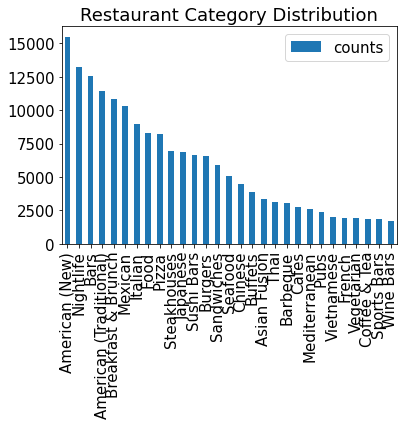

In [37]:
catlist=[]
for category in reviewdata.categories:
    catlist.append(category)
    
catlist

def flat(lis):
    flatList = []
    for x in lis:
        if type(x) is list:
            for y in x:
                flatList.append(y)
        else:
            flatList.append(x)
    return flatList

finalcatlist=flat(catlist)

catdf=pd.DataFrame(finalcatlist).value_counts().rename_axis('category').reset_index(name='counts')
cattrim=catdf.head(30)
cattrim=cattrim[cattrim.category!='Restaurants']

cattrim.plot(kind='bar',title='Restaurant Category Distribution').set_xticklabels(cattrim['category'])

Now that main metrics within the dataset are identified, the dataset can now be prepped for modeling.

## Data Preparation

The first step in prepping the dataset to be summarized is to break each review (currently stored as a text string in the overall table) into individual tokens, separating by commas, then re-populating as a list in each row in the dataframe.
Below, the regular expression pattern is used within the tokenizer to split words, looking for non-letter characters as boundaries while preserving apostrophes within words where relevant.

In [38]:
reviewdata=reviewdata.astype({'text':str},errors='raise')
pattern=r"([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer=RegexpTokenizer(pattern)
reviewdata.text=reviewdata['text'].apply(tokenizer.tokenize)

reviewdata['textlen']=[len(lis) for lis in reviewdata.text]

Out of curiosity, the distribution of a review length by each star rating is depicted in the histogram below. Interestingly, reviews with 1.5 stars have the highest review length on average. This implies that horrendous restaurant experiences cause the average user to write out all they have to say about their experience.

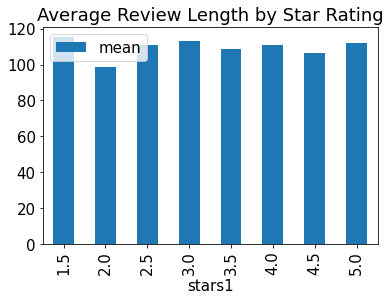

In [39]:
plot=reviewdata.groupby(['stars1'])['textlen'].agg(['mean']).plot(kind="bar",title='Average Review Length by Star Rating')

Similarly, average review length by price range is depicted below. As the dollar signs increase, the average review length increases as well. This may be due to a 1 dollar sign restaurant being viewed as "lower stakes" as a relatively lower amount of money was spent, but with regard to a 4 dollar sign restaurant, it is a significantly higher investment. Customers would want to be more informed about a costly restaurant before risking trying it.

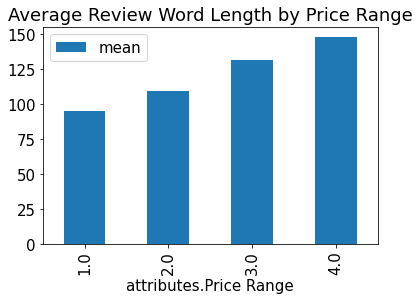

In [40]:
plot=reviewdata.groupby(['attributes.Price Range'])['textlen'].agg(['mean']).plot(kind="bar",title='Average Review Word Length by Price Range')

All words are converted to lowercase in the following step. It would not be desirable to count 2 words as distinct if their only differing factor is case (e.g. "I'm" vs "i'm".)

In the following step, English stopwords were imported and a function was created to remove all stopwords within each review text list. When doing a form of classification, it is important to remove stopwords as there are bound to be sets of words that are common amongst any body of text (e.g. "and","the"). Keeping these words makes it harder for the eventual model to differentiate between two sets of text and make the proper classification.

In [41]:
reviewdata.text=[[word.lower() for word in rev] for rev in reviewdata.text]
reviewdata.text.head(10)

0    [good, back, home, type, of, food, and, the, b...
1    [too, many, fun, memories, here, mostly, drink...
2    [i've, been, back, twice, now, the, first, tim...
3    [great, place, for, a, late, night, meal, cool...
4    [i, used, to, love, this, place, but, over, ti...
5    [green, catered, my, anniversary, party, recen...
6    [leaving, las, vegas, and, heading, back, to, ...
7    [so, i, have, not, been, at, a, rainforest, ca...
8    [i, was, excited, to, try, cravings, at, the, ...
9    [blah, just, walking, into, this, establishmen...
Name: text, dtype: object

In [42]:
sw=stopwords.words('english')

def removestopwords(list):
    removed=[word for word in list if word not in sw]
    return removed
reviewdata.text=reviewdata.text.apply(removestopwords)

sw+=list(["food",'like'])
reviewdata.text=reviewdata.text.apply(removestopwords)

reviewdata.head(5)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,YEAR,votes.useful,...,attributes.Price Range,review_count,stars1,Votestot,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,textlen
0,__FtIsjOxPkqiYfQedYgTg,4Rs8MQBEzfXLrM8Srf5ZFw,"[good, back, home, type, best, service, smile,...",0.0,VkPzsY09S4zO0XqhA1mc6Q,0.0,4.0,2014-07-05,2014.0,0.0,...,2.0,488.0,4.5,4.0,NaN,NaN,NaN,NaN,NaN,50
1,__FtIsjOxPkqiYfQedYgTg,uxqjGjYC8OId-JS-GVLOrQ,"[many, fun, memories, mostly, drinking, servic...",0.0,U87W6T9vjwWnp28Zjnn4pQ,0.0,4.0,2014-07-01,2014.0,0.0,...,2.0,281.0,3.5,4.0,NaN,NaN,NaN,NaN,NaN,37
2,__FXEOrWIjXMOElz2pGlBQ,2KAfm9Lqh-1-qUe8V1cc6w,"[i've, back, twice, first, time, ordered, chim...",0.0,aS-mHlVamCV2rTiw8RrNdw,0.0,5.0,2014-05-08,2014.0,0.0,...,2.0,55.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,50
3,__JgFZ3h2LyTMTtZdf0HYw,SkR3zBOXJggDAIq5qzEUHg,"[great, place, late, night, meal, cool, atomos...",0.0,4bEjOyTaDG24SY5TxsaUNQ,0.0,4.0,2014-03-20,2014.0,0.0,...,2.0,4084.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,25
4,__JmvLJkdl_n48eZCFa4Sg,-XB4eE01MT9qwqj5PSmbvw,"[used, love, place, time, service, gotten, hor...",0.0,eLPld7Q17XxlclFGzZQX5g,0.0,1.0,2014-07-03,2014.0,0.0,...,2.0,874.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,79


As seen below the 'stars1' field is used to map good and bad reviews, at least on a rudimentary level. As a rule of thumb, the model will first consider all reviews with a star count of less than 3.5 as a "bad" review, and greater than 3.5 as a "good review. This designation is not permanent and will be changed in the event of needing further differentiation.

In [43]:
conditions = [
    (reviewdata['stars1'] <3.5),
    (reviewdata['stars1'] >= 3.5)
]

values = ['bad', 'good']

dictrat={'bad':0,'good':1}

reviewdata['rating']=np.select(conditions,values)
reviewdata['realrating']=reviewdata.rating.map(dictrat)

reviewdata=reviewdata[reviewdata['rating'].isin(['bad','good'])]

reviewdata.rating.value_counts()
reviewdata.head(5)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,YEAR,votes.useful,...,stars1,Votestot,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,textlen,rating,realrating
0,__FtIsjOxPkqiYfQedYgTg,4Rs8MQBEzfXLrM8Srf5ZFw,"[good, back, home, type, best, service, smile,...",0.0,VkPzsY09S4zO0XqhA1mc6Q,0.0,4.0,2014-07-05,2014.0,0.0,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,50,good,1.0
1,__FtIsjOxPkqiYfQedYgTg,uxqjGjYC8OId-JS-GVLOrQ,"[many, fun, memories, mostly, drinking, servic...",0.0,U87W6T9vjwWnp28Zjnn4pQ,0.0,4.0,2014-07-01,2014.0,0.0,...,3.5,4.0,NaN,NaN,NaN,NaN,NaN,37,good,1.0
2,__FXEOrWIjXMOElz2pGlBQ,2KAfm9Lqh-1-qUe8V1cc6w,"[i've, back, twice, first, time, ordered, chim...",0.0,aS-mHlVamCV2rTiw8RrNdw,0.0,5.0,2014-05-08,2014.0,0.0,...,4.0,5.0,NaN,NaN,NaN,NaN,NaN,50,good,1.0
3,__JgFZ3h2LyTMTtZdf0HYw,SkR3zBOXJggDAIq5qzEUHg,"[great, place, late, night, meal, cool, atomos...",0.0,4bEjOyTaDG24SY5TxsaUNQ,0.0,4.0,2014-03-20,2014.0,0.0,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,25,good,1.0
4,__JmvLJkdl_n48eZCFa4Sg,-XB4eE01MT9qwqj5PSmbvw,"[used, love, place, time, service, gotten, hor...",0.0,eLPld7Q17XxlclFGzZQX5g,0.0,1.0,2014-07-03,2014.0,0.0,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,79,good,1.0


Below, the word distributions between bad and good reviews are plotted, in order to get up a sense of the differences between the two categories. Both distributions contain good and place as the most frequent words. This makes sense when considering the hypothetical of asking someone whether a restaurant was worth trying. Most would likely start by describing their experience with the food as good or not good. The first words being the most common amongst both sets may prove to be problematic as it would create noise within the model. If necessary, modifications on these words will be applied.

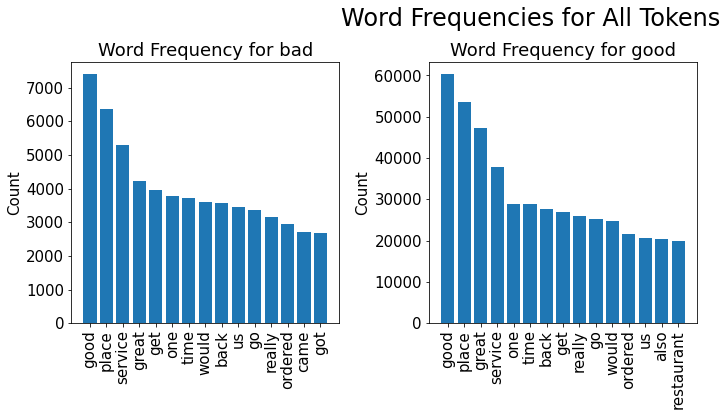

In [44]:
def setup_two_subplots():
    fig = plt.figure(figsize=(15,15))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(3, 6)
    ax1 = fig.add_subplot(gs[0, :2]) 
    ax2 = fig.add_subplot(gs[0, 2:4])

    return fig, [ax1, ax2]

fig, axes = setup_two_subplots()

ratingdict={'bad':0,'good':1}

def plot_distribution_of_column_by_category(df, axes, title="Word Frequency for"):
    ratingmostcommon={}
    for key, value in ratingdict.items():
        all_words=df[df['rating'] == key]['text'].explode()
        freq_dist = FreqDist(all_words)
        top_15 = list(zip(*freq_dist.most_common(15)))
        tokens = top_15[0]
        counts = top_15[1]
        ax=axes[value]
        ax.bar(tokens, counts)
        ax.set_title(f"{title} {key}")
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=90)
        plt.rcParams.update({'font.size':15})

plot_distribution_of_column_by_category(reviewdata, axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

## Data Modeling

The text data has now been cleaned and is ready to be modeled. In order to initialize modeling, the full dataset is split into training and testing groups so that the models can be evaluated in the presence of "new data". Review text is represented by X, and the assigned rating (good/bad) defined by the preceding step is represented by y.

In [45]:
X=reviewdata.text
y=reviewdata.rating

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

### Model 1: TF-IDF Vectorizer + Multinomial Naive Bayes

In order to further prep the data, a term-frequency inverse document frequency vectorizer is initialized. Vectorizers are necessary for this process, as they provide a method of converting text data, currently in the form of lists, into a form that a model can understand. A TF-IDF vectorizer, also known as Term Frequency-Inverse Document Frequency, will be used. This vectorizer is ideal for use in the case of multiple review documents, and due to the nature of the calculation, it implies rare words contain more information than common words. Term Frequency (TF) represents the presence of a word in a document as a fraction, while Inverse Document Frequency (IDF) represents the prevalence of the word across all documents. By multiplying the two, a value for the importance each word has in the entire document base is obtained.

The max_df is specified as 1000, which implies that words are only considered as identifiers for the model if they appear in less than 1000 distinct documents. The min_df is specified as 30, which implies that words are only considered as identifiers for the model if they appear in more than 30 distinct documents. Words that appear too frequently/not frequently enough are not desirable, as their inclusion may decrease resulting performance.

In [46]:
tfidf=TfidfVectorizer(min_df=30,max_df=1000)

X_traindf=pd.DataFrame(X_train,columns=['text'])
X_testdf=pd.DataFrame(X_test,columns=['text'])

X_trainvec=tfidf.fit_transform(X_traindf["text"].apply(lambda x: ' '.join(x)))
X_testvec=tfidf.transform(X_testdf["text"].apply(lambda x: ' '.join(x)))

pd.DataFrame.sparse.from_spmatrix(X_trainvec, columns=tfidf.get_feature_names()).head()

,aaron,ability,absent,absinthe,absolute,absurd,abundance,abundant,ac,acai,...,zero,zest,zesty,zing,zip,zipps,ziti,zone,zoo,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Below, a Multinomial Naive Bayes model is instantiated for our model to be fit on, and the plotted confusion matrix helps visualize how well the model did. The MultinomialNB model is essential for text classification, as it involves using conditional probability across the different categorizations, and is generally good for classifying on distinct features.

The corresponding confusion matrix, seen below, shows how the model classifies the test/train data using the Multinomial Naive Bayes classifier through counts of true/false positives/negatives.

LEGEND:
Bad in True label, Bad in Predicted label - True Negative

Bad in True label, Good in Predicted label - False Positive

Good in True label, Good in Predicted label - True Positive

Good in True label, Bad in Predicted label - False Negative

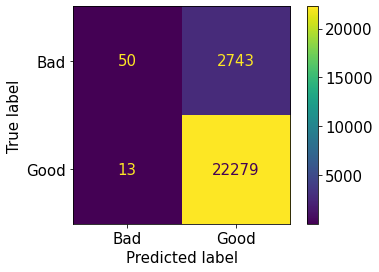

In [47]:
baseline_model = MultinomialNB()

baseline_model.fit(X_trainvec,y_train)
y_hattest=baseline_model.predict(X_testvec)
y_hattrain=baseline_model.predict(X_trainvec)
plot_confusion_matrix(baseline_model, X_testvec, y_test,display_labels=['Bad','Good'])

Below, results of the first model can be seen through the classification report. The classification report outputs 3 metrics of critical importance: precision, recall, accuracy, and f1 score.
These main metrics help understand how well the model performed in terms of classifying each sreview as Good or Bad.

#### Precision:
Precision measures how precise the predictions are. Precision is calculated by taking the number of true Good classifications, and dividing by the number of Good song classifications predicted by the model.

#### Recall:
Recall measures what % of the reviews were actually identified as Good correctly. Recall is calculated by dividing the number of total true Good classifications identified by the model, by the number of actual Good reviews.

#### Accuracy:
Accuracy evaluates all predictions within the model. Accuracy is calculated by dividing the total correct predictions from the model (both Good/Bad) by the total records in the original dataset.

#### F1 Score:
F1 Score takes both precision and recall into account to get a cumulative score. The formula is calculated as follows: 2(precision recall)/(precision + recall). This metric is a good measure of overall model performance, as a high F1 score implies both precision and recall are both high as well.

As seen below, the initial model performs very poorly on the both test data and training data, despite an accuracy overall of 89%. The confusion matrix shows that our model heavily skews towards predicting Good reviews as correctly. This is due to the overwhelming about of commonalities of word frequency between Good and Bad reviews, which can be fixed in subsequent steps.

In [48]:
reporttest1=classification_report(y_test, y_hattest)
reporttrain1=classification_report(y_train, y_hattrain)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest1)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain1)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.79      0.02      0.04      2793
        good       0.89      1.00      0.94     22292

    accuracy                           0.89     25085
   macro avg       0.84      0.51      0.49     25085
weighted avg       0.88      0.89      0.84     25085

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.86      0.02      0.05      8390
        good       0.89      1.00      0.94     66863

    accuracy                           0.89     75253
   macro avg       0.87      0.51      0.49     75253
weighted avg       0.89      0.89      0.84     75253



### Model 2: TF-IDF Vectorizer + Multinomial Naive Bayes, Changing Conditions For Bad/Good Reviews

For the second iteration of the model, since the Multinomial Naive Bayes classifier in conjunction with the TF-IDF vectorizer seemed to be an ideal fit for text data, all model parameters will be kept the same in order to compare similar setups.

This time, in an effort to better differentiate Good/Bad reviews while improving overall accuracy score, the overall review set will be limited by filtering out "mediocre reviews" identified as the 3-4.5 star rating range. While this limits the overall dataset, better classification results are anticipated through this step. In the initial model results, it seemed as if most reviews under the initial conditions were identified as "Good" which makes the overall dataset heavily imbalanced. This step mitigates the discrepancy to a great degree as well. 

In [51]:
conditions = [
    (reviewdata['stars1'] <=3),
    (reviewdata['stars1'] >3) & (reviewdata['stars1'] <4.5),
    (reviewdata['stars1'] >= 4.5)
]

values = ['bad', 'mediocre', 'good']

dictrat={'bad':0,'good':1}

reviewdata['rating']=np.select(conditions,values)
reviewdata['realrating']=reviewdata.rating.map(dictrat)

reviewdata=reviewdata[reviewdata['rating'].isin(['bad','good'])]

reviewdata.rating.value_counts()
reviewdata.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,YEAR,votes.useful,...,stars1,Votestot,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,textlen,rating,realrating
0,__FtIsjOxPkqiYfQedYgTg,4Rs8MQBEzfXLrM8Srf5ZFw,"[good, back, home, type, best, service, smile,...",0.0,VkPzsY09S4zO0XqhA1mc6Q,0.0,4.0,2014-07-05,2014.0,0.0,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,50,good,1
5,__N7qbHbgF4xvqcTkiSrsQ,rZArgGAmPEdGIMVvbZEZAg,"[green, catered, anniversary, party, recently,...",0.0,c1yGkETheht_1vjda7G5sA,0.0,4.0,2014-03-22,2014.0,0.0,...,4.5,4.0,NaN,NaN,NaN,NaN,NaN,134,good,1
7,__nLCwboY2RhiLd6hVSexQ,AL_vCYvwJ5vm3QDx1vXBVw,"[rainforest, cafe, many, many, many, years, on...",0.0,sxRI0je6hAR-MeBDxdyhug,0.0,3.0,2014-03-09,2014.0,0.0,...,2.5,3.0,NaN,NaN,NaN,NaN,NaN,109,bad,0
9,__nLCwboY2RhiLd6hVSexQ,R6kBqGle9wWiHDMz6vnkZg,"[blah, walking, establishment, really, impress...",0.0,JkuXXDySMl5fF0hwmLxNCA,0.0,2.0,2014-03-09,2014.0,1.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,136,bad,0
10,__nLCwboY2RhiLd6hVSexQ,ty4e5jUogHqrLGooicOIig,"[buffets, one, favorite, dining, experiences, ...",0.0,vbcdf7dXxfc3uyOoi7ryyA,0.0,4.0,2014-07-07,2014.0,0.0,...,3.0,4.0,NaN,NaN,NaN,NaN,NaN,187,bad,0


In [21]:
X=reviewdata.text
y=reviewdata.rating

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=41)

In [22]:
tfidf=TfidfVectorizer(min_df=30,max_df=1000)

X_traindf2=pd.DataFrame(X_train,columns=['text'])
X_testdf2=pd.DataFrame(X_test,columns=['text'])

X_trainvec2=tfidf.fit_transform(X_traindf2["text"].apply(lambda x: ' '.join(x)))
X_testvec2=tfidf.transform(X_testdf2["text"].apply(lambda x: ' '.join(x)))

pd.DataFrame.sparse.from_spmatrix(X_trainvec2, columns=tfidf.get_feature_names()).head()

,able,absolute,absolutely,accept,acceptable,access,accidentally,accommodate,accommodated,accommodating,...,york,young,younger,yrs,yuck,yum,yummy,yuzu,zero,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.086891,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


As seen through the heavily improved recall scores within both the test data and training data, we can see evident model improvement with the use of the new condition set. While changing the conditions seemed to increase the overall model performance, additional steps can be implemented to make more clear designations and mitigate false readings.

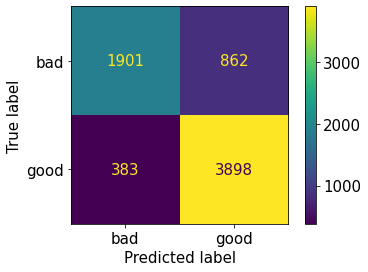

In [23]:
baseline_model = MultinomialNB()

baseline_model.fit(X_trainvec2,y_train)
y_hattest=baseline_model.predict(X_testvec2)
y_hattrain=baseline_model.predict(X_trainvec2)
plot_confusion_matrix(baseline_model, X_testvec2, y_test,display_labels=['bad','good'])

In [24]:
reporttest=classification_report(y_test, y_hattest)
reporttrain=classification_report(y_train, y_hattrain)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.83      0.69      0.75      2763
        good       0.82      0.91      0.86      4281

    accuracy                           0.82      7044
   macro avg       0.83      0.80      0.81      7044
weighted avg       0.82      0.82      0.82      7044

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.85      0.69      0.76      8420
        good       0.82      0.92      0.87     12709

    accuracy                           0.83     21129
   macro avg       0.83      0.81      0.81     21129
weighted avg       0.83      0.83      0.82     21129



### Model 3: TF-IDF Vectorizer + Lemmatizer

As seen in the prior word count distribution across the Good/Bad split, it was observed that some words like “get” and “got” were considered as distinct words although semantically, they have the same meaning. In an effort to improve prior model performance, lemmatization will be performed in order to consolidate based on their root words.  Below, the part of speech (POS) is tagged to each token word, and the root words of each are found. Additionally, more common words amongst the designations are included in order to decrease similarity amongst the genre sets. Word frequencies are revisualized, each designation looking more unique. For the most part, the word frequency still looks relatively similar, but order of frequency is distinctly different between Good/Bad designations.

In [25]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_lemmatizer(doc):
    doc=pos_tag(doc)
    doc=[(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer=WordNetLemmatizer()
    doc=[lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return doc
    

reviewdata.text=[doc_lemmatizer(text) for text in reviewdata.text]

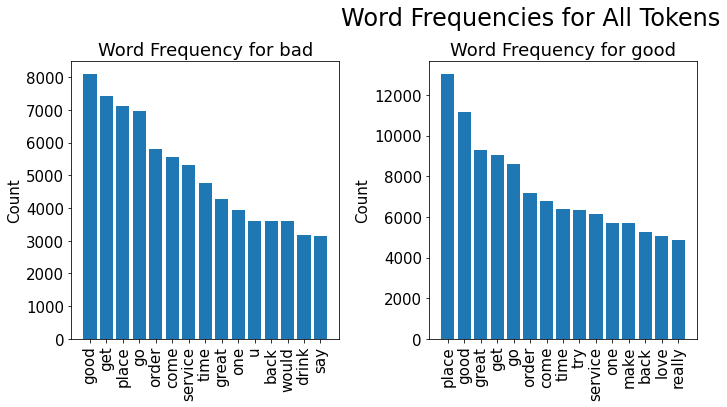

In [26]:
fig, axes = setup_two_subplots()

plot_distribution_of_column_by_category(reviewdata, axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);

In [27]:
X2=reviewdata.text
y2=reviewdata.rating

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=.25, random_state=41)

In [28]:
tfidf=TfidfVectorizer(min_df=30,max_df=1000)

X_traindf=pd.DataFrame(X_train,columns=['text'])
X_testdf=pd.DataFrame(X_test,columns=['text'])

X_trainvec=tfidf.fit_transform(X_traindf["text"].apply(lambda x: ' '.join(x)))
X_testvec=tfidf.transform(X_testdf["text"].apply(lambda x: ' '.join(x)))

pd.DataFrame.sparse.from_spmatrix(X_trainvec, columns=tfidf.get_feature_names()).head()

,able,absolute,absolutely,accent,accept,acceptable,access,accidentally,accommodate,accompaniment,...,yet,yogurt,york,young,yuck,yum,yummy,yuzu,zero,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.082928,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148577,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


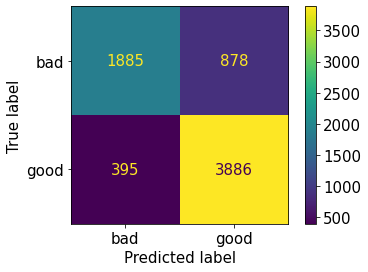

In [29]:
baseline_model = MultinomialNB()

baseline_model.fit(X_trainvec,y_train)
y_hattest=baseline_model.predict(X_testvec)
y_hattrain=baseline_model.predict(X_trainvec)
plot_confusion_matrix(baseline_model, X_testvec, y_test,display_labels=['bad','good'])

As seen in the following classification report, overall performance does not seem to have improved seen from the slight uptick in false positives/negatives. This may just be chalked up to noise, however. 

In [30]:
reporttest=classification_report(y_test, y_hattest)
reporttrain=classification_report(y_train, y_hattrain)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.83      0.68      0.75      2763
        good       0.82      0.91      0.86      4281

    accuracy                           0.82      7044
   macro avg       0.82      0.79      0.80      7044
weighted avg       0.82      0.82      0.82      7044

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.85      0.69      0.76      8420
        good       0.82      0.92      0.86     12709

    accuracy                           0.83     21129
   macro avg       0.83      0.80      0.81     21129
weighted avg       0.83      0.83      0.82     21129



### Model 4: Considering Bigrams/Trigrams

When reading through the individual reviews, it appears that certain word sequences such as "very good" or "not good" were seen multiple times. The issue that arises when vectorizing using each word individually is that the context of where a given word appears can be vastly different. To mitigate this, the sequence of words will be acknowledged to inevitably improve performance, through the use of bigrams and trigrams within the vectorizer. The ngram_range parameter is used to identify all sequences of 1-3 words that appear within the dataset.  

As seen from the output report, performance slightly improved at mitigating false positives, which is a good sign since  the majority of the data is comprised of good reviews anyways. It seems Recall and Precision for Bad reviews increased as well. Overall accuracy went up from 82 to 83 in testing data and 83 to 84 in training data. This shows that the consideration of bigrams/trigrams made a positive improvement on model performance.

In [31]:
tfidf=TfidfVectorizer(min_df=30,max_df=1000, ngram_range=(1,3))

X_traindf=pd.DataFrame(X_train,columns=['text'])
X_testdf=pd.DataFrame(X_test,columns=['text'])

X_trainvec=tfidf.fit_transform(X_traindf["text"].apply(lambda x: ' '.join(x)))
X_testvec=tfidf.transform(X_testdf["text"].apply(lambda x: ' '.join(x)))

pd.DataFrame.sparse.from_spmatrix(X_trainvec, columns=tfidf.get_feature_names()).head()

,able,able eat,able get,absolute,absolute favorite,absolutely,absolutely amaze,absolutely amazing,absolutely delicious,absolutely love,...,york,young,yuck,yum,yum yum,yummy,yuzu,zero,zero star,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.074319,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


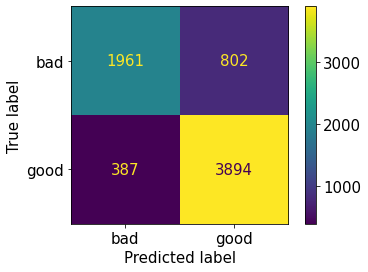

In [32]:
baseline_model = MultinomialNB()

baseline_model.fit(X_trainvec,y_train)
y_hattest=baseline_model.predict(X_testvec)
y_hattrain=baseline_model.predict(X_trainvec)
plot_confusion_matrix(baseline_model, X_testvec, y_test,display_labels=['bad','good'])

In [33]:
reporttest=classification_report(y_test, y_hattest)
reporttrain=classification_report(y_train, y_hattrain)

print('Test Data Classification Report')
print('_________________________________')
print(reporttest)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.84      0.71      0.77      2763
        good       0.83      0.91      0.87      4281

    accuracy                           0.83      7044
   macro avg       0.83      0.81      0.82      7044
weighted avg       0.83      0.83      0.83      7044

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.86      0.73      0.79      8420
        good       0.84      0.92      0.88     12709

    accuracy                           0.84     21129
   macro avg       0.85      0.82      0.83     21129
weighted avg       0.85      0.84      0.84     21129



The model is in an overall better state/performance level when compared to the original output after filtering on relevant reviews, lemmatizing, and implementing bigrams/trigrams. Below, a list of the most impactful coefficients paired with their respective word sets can be seen in the dataframe below. The absolute value of the coefficients were taken in order to observe the highest magnitude of effect. 

In [34]:
flattenednames=tfidf.get_feature_names()

flattenedcoef=baseline_model.coef_.flatten()

zipped = zip(flattenednames, flattenedcoef)
rankeddf = pd.DataFrame(zipped, columns=["feature", "value"])
rankeddf["abs_value"] = rankeddf["value"].apply(lambda x: abs(x))
rankeddf = rankeddf.sort_values("abs_value", ascending=False)
rankeddf=rankeddf[['feature','abs_value']]

rankeddf.head(50)

,feature,abs_value
2335,hooter,11.095267
566,bull,11.095267
1773,frozen hot chocolate,11.095267
1994,golden corral,11.095267
5137,venetian,11.095267
4181,serendipity,11.095267
1068,dance floor,11.095267
1772,frozen hot,11.095267
3933,resort fee,11.095267
1199,dim sum,11.008127


#  Classifier Results Evaluation

When considering a matter as sensitive as the restaurant industry, the distribution of words chosen across the breadth of different reviews have a large impact on how a restaurant is perceived and recognized by cultures and communities. The final model created, using a Multinomial Naive Bayes classifier with a TF-IDF vectorizer, was able to differentiate good/bad reviews with an accuracy of 83% for test data and 84% for training data. 

A classification report and confusion matrix of the final classifier model iteration can be seen below across the test/train datasets.

In [35]:
print('Test Data Classification Report')
print('_________________________________')
print(reporttest)
print('Training Data Classification Report')
print('_________________________________')
print(reporttrain)

Test Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.84      0.71      0.77      2763
        good       0.83      0.91      0.87      4281

    accuracy                           0.83      7044
   macro avg       0.83      0.81      0.82      7044
weighted avg       0.83      0.83      0.83      7044

Training Data Classification Report
_________________________________
              precision    recall  f1-score   support

         bad       0.86      0.73      0.79      8420
        good       0.84      0.92      0.88     12709

    accuracy                           0.84     21129
   macro avg       0.85      0.82      0.83     21129
weighted avg       0.85      0.84      0.84     21129



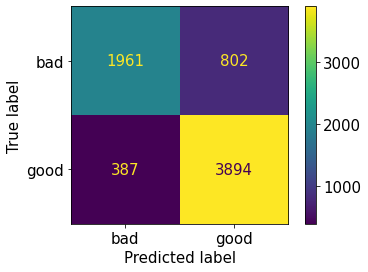

In [36]:
plot_confusion_matrix(baseline_model, X_testvec, y_test,display_labels=['bad','good'])

The model performance is relatively strong, when considering the overall imbalance between good and bad reviews. This imbalance is to be expected, however, as seen through the previous plotted distributions, more people tend to leave relatively positive reviews for restaurants. In an ideal scenario, there would be an equal distrbution of good/bad restaurant reviews, but people may not want to leave bad reviews often, potentially out of fear of ruining someone's livelihood.


Several of the identified words/phrases below seemed to highlight features and experiences regarding the restaurants in the dataset, both good and bad. The themes around the experience-oriented phrases revolve around money spent or bad experiences from attending staff (e.g. speaking to managers, hospitality, sub-par service, saving money, taking forever, horrible service). It seems as if these issues, when apparent from the customer end, may even be reflected through the experience with the food. Inefficiencies with any restaurant or business are hard to ignore, and they translate down to the inevitable service a customer gets.

In [37]:
rankeddf.head(50)

,feature,abs_value
2335,hooter,11.095267
566,bull,11.095267
1773,frozen hot chocolate,11.095267
1994,golden corral,11.095267
5137,venetian,11.095267
4181,serendipity,11.095267
1068,dance floor,11.095267
1772,frozen hot,11.095267
3933,resort fee,11.095267
1199,dim sum,11.008127


# Recommendation System

To supplement the NLP analysis, a follow up component to the analysis is the creation of a recommendation system based on other users' reviews. While knowing key points of improvement proves to be a good solution for restaurants, a recommendation system is a client facing solution that also involves user input. These recommendations, supplemented by the tendencies found in the NLP analysis, provides a holistic, well-informed method of gauging restaurant value/worth. 

In [39]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

The surprise package is imported above, and is used to read in the relevant fields from the review dataset. The surprise package incorporates a data type that is particularly good when it comes to building recommendation systems that are optimized for computational efficiency. 

Below, it is seen that there are far more users than there are businesses. That being said, user-user comparison will likely be a more efficient/successful route for this recommender system, which compares similar users to similar users. 

In [40]:
recdata=reviewdata[['user_id','business_id','name','categories','stars1']]
recdata.head()
recdata=recdata[['user_id','business_id','stars1']]

# read in values as Surprise dataset 
reader=Reader()
recdatarec=Dataset.load_from_df(recdata,reader)

recdataset = recdatarec.build_full_trainset()
print('Number of users: ', recdataset.n_users, '\n')
print('Number of businesses: ', recdataset.n_items)

Number of users:  20426 

Number of businesses:  931


Single Value Decomposition was used to generate a model that outputs user recommendations. Single Value Decomposition (SVD) is used to reduce a matrix into several component matrices, while revealing interesting tendencies about the original matrix. SVD involves the creation of an optimization problem; minimization of the prediction error margin is measured through the root mean squared error (RMSE). A lower RMSE is indicative of improved performance and vice versa.  

Grid search is used on the SVD model in order to view the lowest RMSE scores with the tested parameters. n_factors is one of the factors that refers to the number of factors that the matrix will be considered when making predictions. reg_all refers to the regularization term for all parameters. 

Below, the RMSE for the ideal model is only .208 for the relevant readers and prodictions. this is relatiely strong, because it measn our model is only off by a fraction of a star for its generated predictions. That being said, it is safe to assume that the system will be successfful in assigning predictions to the user. 

In [41]:
params = {'n_factors': [5,10,15,20,100],
         'reg_all': [.01, .015, 0.02]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(recdatarec)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

svd = SVD(n_factors=5, reg_all=0.01)
svd.fit(recdataset)

{'rmse': 0.20853589999031072, 'mae': 0.12306453117129068}
{'rmse': {'n_factors': 5, 'reg_all': 0.01}, 'mae': {'n_factors': 5, 'reg_all': 0.01}}


Below, the following programs are defined, prompting the user to input ratings for a random selection of restaurants for respective chosen category. if the user has not visited the restaurant, n should be inputted, and rows are sampled until a max of 5 records for the given user ID are selected.

In [44]:
restreviews=pd.read_csv('yelpcomgen.csv',header=0,encoding='latin-1')
restreviews = restreviews[restreviews["categories"].notna()]
cleanedreviews=restreviews[['user_id','business_id','name','categories','stars1']]

def yelprater(recs,num,user,cat=None):
    userID = user
    rating_list = []
    recs=recs[['business_id','name','categories']]
    while num > 0:
        if cat:
            rest = recs[recs['categories'].str.contains(cat)].sample(1)
        else:
            rest = recs.sample(1)
        print(rest)
        rating = input('How do you rate this restaurant/business on a scale of 1-5, press n if you have not been :\n')
        if rating == 'n':
            continue
        else:
            onerest = {'user_id':userID,'business_id':rest['business_id'].values[0],'stars1':rating}
            rating_list.append(onerest) 
            num -= 1    
    return rating_list  

C:\Users\noahi\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,1,2,4,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The recommendations are then appended to the overall review table and the SVD model is run with the additional data. finally, a function is defined, which outputs a top 10 ranked set of recommended restaurants sorted by the predicted user rating. 

In [43]:
def filternamerecs(recs,num,user,cat=None):
    ratelist=yelprater(recs,num,user,cat)
    filrecs=recs[['business_id','categories','name']]
    filrecs=filrecs[filrecs['categories'].str.contains(cat)]
    filrecs.set_index('business_id',inplace=True)
    
    restapp=recs.append(ratelist,ignore_index=True)
    restapp=restapp.drop(columns=['categories','name'])
    restdata=Dataset.load_from_df(restapp,reader)
    svd.fit(restdata.build_full_trainset())
    list_of_restaurants = []
    for r_id in restapp['business_id'].unique():
        list_of_restaurants.append((r_id,svd.predict(10,r_id)[3]))
    
    rankedrest=pd.DataFrame(list_of_restaurants).drop_duplicates()
    rankedrest.columns=['business_id','recrating']
    rankedrest.set_index('business_id',inplace=True)
    
    joined=pd.concat([filrecs,rankedrest],join='inner',axis=1).sort_values(by=['recrating'],ascending=False).drop_duplicates()
    return joined.head(10)

Below, the ranked recommendations of restaurants are generated for the below user ID and the following inputs

In [45]:
 filternamerecs(cleanedreviews,5,123123,'Sushi')

                  business_id           name                       categories
29764  l5FvoKE2-k6JpGVuhH9YVA  Sushi Catcher  Sushi Bars;Japanese;Restaurants
How do you rate this restaurant/business on a scale of 1-5, press n if you have not been :
2
                  business_id                    name  \
92481  SPBZxmt8_nT30rNVnKHYKA  Akaihana Sushi & Grill   

                            categories  
92481  Sushi Bars;Japanese;Restaurants  
How do you rate this restaurant/business on a scale of 1-5, press n if you have not been :
1
                  business_id         name                       categories
35796  6syMU43FKGkcbX2957Ga8A  Sekai Sushi  Sushi Bars;Japanese;Restaurants
How do you rate this restaurant/business on a scale of 1-5, press n if you have not been :
2
                  business_id               name  \
87008  V3ruBXjLGWniPNPQOzRhiw  Makino Restaurant   

                            categories  
87008  Sushi Bars;Japanese;Restaurants  
How do you rate this restaura

,categories,name,recrating
business_id,,,
6X9iyuM2XdoCGT4q9qv5cA,Sushi Bars;Japanese;Restaurants,JJANGA Japanese Restaurant,4.492273
OwBPjUz2o0J5K3DzcHkBtg,Sushi Bars;Japanese;Restaurants,Soho Japanese Restaurant,4.491927
HpaYCM_NCauI72LLXxC6SA,Tapas/Small Plates;Sushi Bars;Japanese;Restaur...,Yonaka Modern Japanese,4.489452
sNBquLTaV3IbUWkzSUlTpw,Sushi Bars;Japanese;Restaurants,Sakana,4.489281
Pgp3gbOQaJIdyjqC9AOz6g,Sushi Bars;Restaurants,I Love Sushi,4.489053
bpGFetX8muk0GxAT3Oea3Q,Sushi Bars;Japanese;Restaurants,Yummy Grill & Sushi,4.485786
u6EUXOSFnjxvzLll4D21bA,Sushi Bars;Japanese;Restaurants,Harumi Sushi,4.485590
i5Tq_jzm3osbY_uEJ79N1g,Seafood;Sushi Bars;Japanese;Restaurants,Tokyo Boys,4.480236
QrRNFiSXmCo4pzVLAhA_bw,Steakhouses;Sushi Bars;Japanese;Restaurants,Kanji Steak & Sushi,4.479729


While this method of assignment is invaluable at generating user predictions, it is highly advised for all users to take the next step of parsing through the business pages of the model outputs, in order to get more context before deciding to go to a given restaurant. As seen in the prior analysis the value of reading through review text gives the most informed decision for any restaurant goer. 

# Conclusion

The model was able to successfully assign the majority of restaurant reviews in the dataset, solely through the use of Yelp review text. An 83% accuracy across both test/training data shows that the model performs relatively well, even in the face of new data. The model's important feature outputs, given in the form of coefficients and paired key words/phrases, should be scrutinized in order to understand the most critical elements that should be focused on when it comes to restaurant improvement.

As seen in the ranked keyword importances from the model, several words that were most impactful for the performance of the overall classifier identified a restaurant's features and experiences, both good and bad.

The themes around the experience-oriented phrases revolve around money spent or bad experiences from attending staff (e.g. speaking to managers, hospitality, sub-par service, saving money, taking forever, horrible service). It seems as if these issues, when apparent from the customer end, may even be reflected through the experience with the food. Inefficiencies with any restaurant or business are hard to ignore, and they translate down to the inevitable service a customer gets.

For example, in the FX show The Bear, an accurate look into the life of restaurant workers, depicts a prime when communication, organization, and efficiency are not at the forefront of any operating business. In the scene depicted below, chaos in the kitchen soon ensues when tension between the cooks and chef starts to flare. The aftermath of this scene is not shown, but it is implied that several customers orders were left unfulfilled. Similar to the outputs of the model keywords, long wait times and terrible service are indicative of bad performance.


https://www.youtube.com/watch?v=1K3z62yoiOA


Money-oriented words/phrases were identified as well, implying perceived customer value of the food served also plays a big part in the overall satisfaction (e.g. "full price", "save money", "waste time money"). If a customer doesn't believe that the food they received was worth the money they paid they are less likely to support that restaurant in the future. 


## Recommendations

In order to improve overall restaurant reviews and customer satisfaction, improvement should be looked at through the lens of service improvement, and food quality. In reality, there is a significant overlap between the factors, but both can be improved through different means. 

In terms of organization, different systems can be established, such as the Brigade de cuisine invented by Escoffier,  a hierarchal system found in restaurants that keeps the overall kitchen working similarly to a well-oiled machine. This system, when implemented, allows for no margin of error while emphasizing precision and productivity. Confusion and lack of clarity are mitigated to a large degree when kitchen staff has defined and stable roles. Newfound organization would improve customer wait times and overall satisfaction.

Outside of the logistical framework, service improvement can be achieved through front-of-house staff training, emphasizing professionalism and enthusiastic service. Vetting waiters and servers to ensure that temperament and values align is critical in ensuring a customer feels welcome and accepted. Comments around rude service would be reduced when all diner-facing staff cultivates a common friendly culture.

Rude service may also stem from worker compensation, as staff members may feel disgruntled when their work does not reflect what they take home at the end of the day. This is especially evident in America, where the majority of what a waiter makes is based on tips. If overall base wages were improved, waiters/busboys would not feel feel the pressure to "fake" friendliness in order to get paid. Their enthusiasm and desire to work at a given establishment would translate into the service they provide. 

The "value" oriented comments are somewhat trickier to mitigate, but can be managed through the kitchen's supply chain. Customers may not feel like they get the "bang for their buck" if they pay too much for a smaller portion than they were expecting. Understandably restaurants do have to price their food in certain ways to keep their overall profit margins high and pay their staff fairly. In order to keep prices low, expensive/costly ingredients can be substituted with cheaper alternatives, keeping the focus on quality and identity of a given dish.


## Next Steps


Next steps with the overall model would involve using a more nuanced system of ratings to evaluate, rather than just a 5 star review. Seen through Metacritic movie reviews, a score of 1-100 would be more valuable to interpret, as there is more of a range/scale that users could input. A rating of 4 stars may mean something different to many different users, either average, or very good. A rating of 90 implies several aspects hit the mark, but slight points of improvement can be observed. Using a review system on this scale may improve overall model accuracy.

Another avenue to explore would be to utilize more filtering options within the recommendation system, such as price range, in order to create more nuanced recommendations. Being able to hone in on a more granular level would make the recommendation system more usable/dynamic for the average diner. 

Additionally, combining both components of the project by displaying top words of significance/frequency for each restaurant recommendation could provide more context in a  decision to dine. 

Using a logistic regresssion model on the additional features that were present in the initial dataset, such as presence of restaurant features and votes on individual reviews, would provide a different perspective on the most critical features that influence good/bad reviews. Restaurants would be able to add these features (e.g. a salad bar) in an effort to improve customer perception.

Running the NLP analysis under the grain of restaurant categories may reveal if some cuisine types receive worse criticism than others. Restaurants with differing cuisine types may require differing solutions. The output for each of the category types would provide a solution set for each cuisine.